# Exploratory Process Mining — Event Log Analysis with pm4py

## Project Overview
This notebook presents an **exploratory process mining** analysis performed on an event log using the **pm4py** framework.
The goal is to understand real process behavior by analyzing traces, activities, variants, and execution patterns derived directly from recorded events.

All code outputs (prints and figures) are intentionally preserved to ensure transparency and reproducibility.


## Event Log Context
The dataset represents a real-world event log where each event is associated with:
- A **case identifier** (process instance)
- An **activity name**
- A **timestamp**

Such logs enable data-driven reconstruction and analysis of actual process behavior without relying on assumptions.


## Methodology
1. Load and validate the event log using pm4py  
2. Explore the structure of cases, activities, and timestamps  
3. Analyze trace lengths and activity frequencies  
4. Identify and inspect process variants  
5. Preserve intermediate outputs to support interpretability


In [1]:
from IPython.display import clear_output

# El siguiente código sólo se ejecuta si nos encontramos en ambiente Google Colab
if 'google.colab' in str(get_ipython()):
  # Log de eventos en formato XES
  !gdown --id 12jaCdN3bF8kx2Sq1q86WlWLy5LrDFCeh

  # Log de eventos en formato CSV
  !gdown --id 12fURr7Z835K5v0Pbzz08j0KM8DHO0gVQ

clear_output()
print("Logs 'Reparacion de Vehiculos.xes' y 'Reparacion Vehiculos.csv' cargados.")

Logs 'Reparacion de Vehiculos.xes' y 'Reparacion Vehiculos.csv' cargados.


In [2]:
!pip install pm4py

clear_output()
print("PM4Py instalado.")

PM4Py instalado.


In [3]:
import pm4py

log_xes = pm4py.read_xes('reparacion_vehiculos.xes')

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/938 [00:00<?, ?it/s]

In [4]:
log_xes.head()

,concept:name,lifecycle:transition,time:timestamp,Actividad,Ejecutor,case:concept:name,case:variant,case:variant-index,case:creator
0,Recibir vehiculo,start,2023-07-17 08:00:20-04:00,Recibir vehiculo,Pablo,1,Variant 3,3,Fluxicon Disco
1,Recibir vehiculo,complete,2023-07-17 08:15:21-04:00,Recibir vehiculo,Pablo,1,Variant 3,3,Fluxicon Disco
2,Elaborar presupuesto,start,2023-07-17 08:34:30-04:00,Elaborar presupuesto,Norma,1,Variant 3,3,Fluxicon Disco
3,Elaborar presupuesto,complete,2023-07-17 09:25:31-04:00,Elaborar presupuesto,Norma,1,Variant 3,3,Fluxicon Disco
4,Enviar presupuesto a cliente,start,2023-07-17 09:45:16-04:00,Enviar presupuesto a cliente,Gabriela,1,Variant 3,3,Fluxicon Disco


In [5]:
import pandas as pd

log_csv = pd.read_csv('reparacion_vehiculos.csv', sep = ';')

log_csv = pm4py.format_dataframe(log_csv,
                                case_id='ID Caso',
                                activity_key='Actividad',
                                timestamp_key='Fin',
                                timest_format  = '%Y-%m-%d %H:%M:%S')

In [6]:
log_csv.head()

,ID Caso,Actividad,Inicio,Fin,Ejecutor,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,1,Recibir vehiculo,2023-07-17 08:00:20+00:00,2023-07-17 08:15:21+00:00,Pablo,1,Recibir vehiculo,2023-07-17 08:15:21+00:00,0,0
1,1,Elaborar presupuesto,2023-07-17 08:34:30+00:00,2023-07-17 09:25:31+00:00,Norma,1,Elaborar presupuesto,2023-07-17 09:25:31+00:00,1,0
2,1,Enviar presupuesto a cliente,2023-07-17 09:45:16+00:00,2023-07-17 09:50:25+00:00,Gabriela,1,Enviar presupuesto a cliente,2023-07-17 09:50:25+00:00,2,0
3,1,Recibir respuesta,2023-07-17 11:34:47+00:00,2023-07-17 11:34:47+00:00,Gabriela,1,Recibir respuesta,2023-07-17 11:34:47+00:00,3,0
4,1,Coordinar retiro,2023-07-18 08:06:42+00:00,2023-07-18 08:20:18+00:00,Gabriela,1,Coordinar retiro,2023-07-18 08:20:18+00:00,4,0


In [7]:
print("Cantidad de casos en el log de eventos: " + str(len(set(log_csv['case:concept:name']))))

Cantidad de casos en el log de eventos: 938


In [8]:
actividades = pm4py.stats.get_event_attribute_values(log_csv, 'concept:name')

actividades

{'Recibir vehiculo': 938,
 'Elaborar presupuesto': 938,
 'Enviar presupuesto a cliente': 938,
 'Comprar repuestos': 888,
 'Recibir respuesta': 882,
 'Recibir repuestos': 867,
 'Restaurar danos': 800,
 'Instalar repuestos': 797,
 'Pintar vehiculo': 790,
 'Probar vehiculo': 790,
 'Entregar vehiculo': 783,
 'Coordinar retiro': 127}

In [9]:
ejecutores = pm4py.stats.get_event_attribute_values(log_csv, 'Ejecutor')
ejecutores

{'Violeta': 1755,
 'Pablo': 1721,
 'Daniela': 988,
 'Gabriela': 959,
 'Roberto': 447,
 'Bernardo': 439,
 'Norma': 433,
 'Victor': 422,
 'Alejandro': 409,
 'Arturo': 407,
 'Pedro': 403,
 'Isabel': 395,
 'Mario': 386,
 'Jose': 374}

In [10]:
actividades_de_inicio = pm4py.stats.get_start_activities(log_csv)
actividades_de_inicio

{'Recibir vehiculo': 938}

In [11]:
actividades_de_fin = pm4py.stats.get_end_activities(log_csv)
actividades_de_fin

{'Entregar vehiculo': 783,
 'Recibir repuestos': 72,
 'Probar vehiculo': 23,
 'Comprar repuestos': 19,
 'Enviar presupuesto a cliente': 13,
 'Recibir respuesta': 10,
 'Coordinar retiro': 7,
 'Restaurar danos': 6,
 'Instalar repuestos': 5}

In [12]:
variantes = pm4py.stats.get_variants(log_csv)
variantes

{('Recibir vehiculo',
  'Elaborar presupuesto',
  'Enviar presupuesto a cliente',
  'Recibir respuesta',
  'Coordinar retiro',
  'Entregar vehiculo'): 78,
 ('Recibir vehiculo',
  'Elaborar presupuesto',
  'Enviar presupuesto a cliente',
  'Recibir respuesta',
  'Restaurar danos',
  'Comprar repuestos',
  'Recibir repuestos',
  'Instalar repuestos',
  'Pintar vehiculo',
  'Probar vehiculo',
  'Entregar vehiculo'): 55,
 ('Recibir vehiculo',
  'Elaborar presupuesto',
  'Enviar presupuesto a cliente',
  'Recibir respuesta',
  'Comprar repuestos',
  'Restaurar danos',
  'Recibir repuestos',
  'Instalar repuestos',
  'Pintar vehiculo',
  'Probar vehiculo',
  'Entregar vehiculo'): 78,
 ('Recibir vehiculo',
  'Elaborar presupuesto',
  'Enviar presupuesto a cliente',
  'Recibir respuesta',
  'Comprar repuestos',
  'Recibir repuestos',
  'Restaurar danos',
  'Instalar repuestos',
  'Pintar vehiculo',
  'Probar vehiculo',
  'Entregar vehiculo'): 236,
 ('Recibir vehiculo',
  'Elaborar presupuesto'

In [13]:
cant_variantes = len(pm4py.stats.get_variants(log_csv))
print('El event log cuenta con', cant_variantes, 'variantes')

El event log cuenta con 53 variantes


In [14]:
# Convierto a tipo de dato list, el cuál permite ordenarse
list_variantes = list(variantes.items())
# Ordeno las variantes
list_variantes.sort(key = lambda x: x[1], reverse=True)

# Mostraré las 5 más comunes
for var in list_variantes[0:5]:
  print(var)

(('Recibir vehiculo', 'Elaborar presupuesto', 'Enviar presupuesto a cliente', 'Recibir respuesta', 'Comprar repuestos', 'Recibir repuestos', 'Restaurar danos', 'Instalar repuestos', 'Pintar vehiculo', 'Probar vehiculo', 'Entregar vehiculo'), 236)
(('Recibir vehiculo', 'Elaborar presupuesto', 'Enviar presupuesto a cliente', 'Recibir respuesta', 'Comprar repuestos', 'Recibir repuestos', 'Instalar repuestos', 'Restaurar danos', 'Pintar vehiculo', 'Probar vehiculo', 'Entregar vehiculo'), 216)
(('Recibir vehiculo', 'Elaborar presupuesto', 'Enviar presupuesto a cliente', 'Recibir respuesta', 'Coordinar retiro', 'Entregar vehiculo'), 78)
(('Recibir vehiculo', 'Elaborar presupuesto', 'Enviar presupuesto a cliente', 'Recibir respuesta', 'Comprar repuestos', 'Restaurar danos', 'Recibir repuestos', 'Instalar repuestos', 'Pintar vehiculo', 'Probar vehiculo', 'Entregar vehiculo'), 78)
(('Recibir vehiculo', 'Elaborar presupuesto', 'Enviar presupuesto a cliente', 'Recibir respuesta', 'Comprar repuest

In [15]:
duraciones_casos = pm4py.stats.get_all_case_durations(log_csv)
duraciones_casos

[4058.0,
 5117.0,
 5204.0,
 6708.0,
 8299.0,
 8456.0,
 8598.0,
 9663.0,
 9906.0,
 10583.0,
 12098.0,
 14117.0,
 14162.0,
 21577.0,
 30717.0,
 31109.0,
 32326.0,
 32863.0,
 37734.0,
 44519.0,
 73730.0,
 74689.0,
 77928.0,
 78681.0,
 83220.0,
 84289.0,
 84450.0,
 86418.0,
 95428.0,
 105437.0,
 109699.0,
 110873.0,
 112441.0,
 113513.0,
 117918.0,
 118619.0,
 140754.0,
 158661.0,
 160940.0,
 162399.0,
 164419.0,
 164778.0,
 166156.0,
 166857.0,
 167157.0,
 167955.0,
 168518.0,
 170155.0,
 171963.0,
 172833.0,
 173227.0,
 173569.0,
 173987.0,
 189085.0,
 190846.0,
 193030.0,
 194274.0,
 196652.0,
 196702.0,
 197616.0,
 200520.0,
 200760.0,
 202799.0,
 204004.0,
 204326.0,
 204493.0,
 217677.0,
 247247.0,
 247816.0,
 247923.0,
 248755.0,
 250707.0,
 251414.0,
 254427.0,
 258355.0,
 258993.0,
 259131.0,
 272865.0,
 277187.0,
 277684.0,
 278141.0,
 280603.0,
 282047.0,
 284608.0,
 331739.0,
 332188.0,
 333003.0,
 335921.0,
 338536.0,
 339849.0,
 341397.0,
 342466.0,
 343192.0,
 343475.0,
 344

In [16]:
import numpy as np

duracion_promedio = round(np.mean(duraciones_casos))

duracion_mediana = round(np.median(duraciones_casos))

print('Promedio de duración de los casos:', duracion_promedio)
print('Mediana de duración de los casos:', duracion_mediana)

Promedio de duración de los casos: 888810
Mediana de duración de los casos: 891144


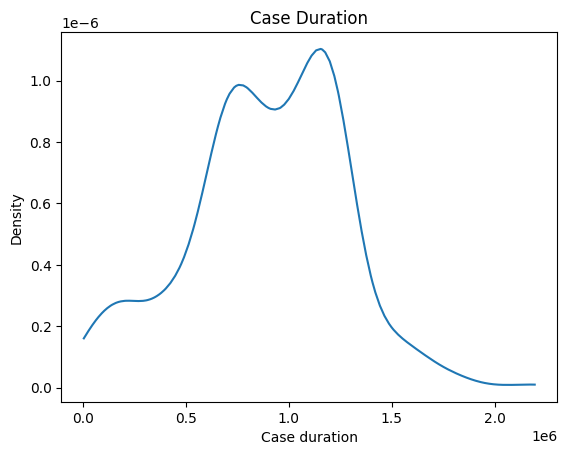

In [17]:
pm4py.view_case_duration_graph(log_csv)

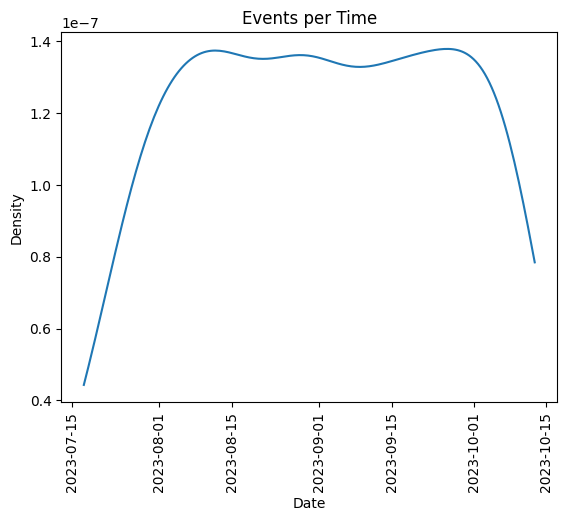

In [18]:
pm4py.view_events_per_time_graph(log_csv)

In [20]:
# Recordemos las actividades
actividades_de_fin = pm4py.stats.get_end_activities(log_csv)
actividades_de_fin

{'Entregar vehiculo': 783,
 'Recibir repuestos': 72,
 'Probar vehiculo': 23,
 'Comprar repuestos': 19,
 'Enviar presupuesto a cliente': 13,
 'Recibir respuesta': 10,
 'Coordinar retiro': 7,
 'Restaurar danos': 6,
 'Instalar repuestos': 5}

In [21]:
log_filtrado = pm4py.filtering.filter_end_activities(log_csv, ['Entregar vehiculo'])

In [22]:
actividades_de_fin = pm4py.stats.get_end_activities(log_filtrado)
actividades_de_fin

{'Entregar vehiculo': 783}

In [23]:
len(pm4py.stats.get_variants(log_filtrado))

34

In [24]:
casos_sin_alejandro = pm4py.filtering.filter_event_attribute_values(log_filtrado,
                                              attribute_key = 'Ejecutor',
                                              values = ['Alejandro'],
                                              retain = False,
                                              level = 'case'
                                              )

In [25]:
set(casos_sin_alejandro['Ejecutor'])

{'Arturo',
 'Bernardo',
 'Daniela',
 'Gabriela',
 'Isabel',
 'Jose',
 'Mario',
 'Norma',
 'Pablo',
 'Pedro',
 'Roberto',
 'Victor',
 'Violeta'}

In [26]:
len(set(casos_sin_alejandro['case:concept:name']))

700

In [27]:
eventos_sin_alejandro = pm4py.filtering.filter_event_attribute_values(log_filtrado,
                                              attribute_key = 'Ejecutor',
                                              values = ['Alejandro'],
                                              retain = False,
                                              level = 'event'
                                              )

In [28]:
len(set(eventos_sin_alejandro['case:concept:name']))

783

In [29]:
set(casos_sin_alejandro['Ejecutor'])

{'Arturo',
 'Bernardo',
 'Daniela',
 'Gabriela',
 'Isabel',
 'Jose',
 'Mario',
 'Norma',
 'Pablo',
 'Pedro',
 'Roberto',
 'Victor',
 'Violeta'}

## Conclusion
This exploratory analysis demonstrates how process mining techniques can be used to gain visibility into real operational behavior.
By focusing on traces and variants, the notebook highlights process variability and dominant execution paths commonly found in real-world systems.
The workflow provides a solid analytical foundation for further steps such as process discovery, performance analysis, or conformance checking.
